#### Name: Jon Stowers

# PHYS 230 Lab Assignment 8

### Wednesday, February 18: Chapter 5.1-5.3
- Evaluating integrals in python 
    - Trapezoidal Rule
    - Simpson's Rule

#### Start by importing any packages you need below (feel free to update as you go):

In [20]:
import numpy as np
import matplotlib.pyplot as plt

## The overall goal of lab today 

Today we are going to evaluate the integral: 
$$\int_{1.1}^{10.1} \frac{\sin{x}}{\ln{x}} \,dx $$

### Step 1 (10 pts)

Write a user-defined function `f(x)` to evaluate the given **function** in the integral. Include comments in your code (and markdown cell, if necessary) explaining your process. 

In [2]:

def f(x):
    return np.sin(x) / np.log(x) #numpy log is the natural logarithm






### Applying Trapezoidal Rule (22 pts)


Write a code to do the following: 
- Create a user-defined function `trapezoidal_int(a,b,N,f)` to determine the integral using the trapezoidal rule using your function defined above 

    - here: a = the lower limit of the integrand, b = upper limit, N = number of steps, and f = the function from above 
- Do so using $N = 100$ steps
- Do so again by doubling the number of steps and seeing how much the result accuracy changes by. 
- Estimate the error on the result using the equation discussed in class. 

When your program is complete, add a markdown cell below it to explain your process and program. Don't forget to comment in your code

In [4]:
# Function to integrate using Trapezoidal Rule 


def trapezoidal_int(a,b,N,f):

    h = (b-a)/N #width (height) of each trapezoid

    sum = 0.5*f(a) + 0.5*f(b) #before the sum
    for k in range(1,N): #goes from 1 to N-1, as stipulated by the summation
        sum += f(a+k*h)
    
    return sum * h #final multiple outside the square brackets


In [6]:
# N = 100 steps 

I1 = trapezoidal_int(1.1,10.1,100,f)

print('For N = 100 steps, the integral is',I1)



For N = 100 steps, the integral is 2.9021883624907003


In [7]:
# double steps 
I2 = trapezoidal_int(1.1,10.1,200,f)

print('For N = 100 steps, the integral is',I2)



For N = 100 steps, the integral is 2.8628779013854735


In [8]:
# estimate error 
error = 1/3 * np.abs(I2 - I1)

print('The estimated error between the two is',error)



The estimated error between the two is 0.013103487035075615


### Applying Simpson's Rule (22 pts)

Write a code to do the following: 
- Create a user-defined function `simpsons_int(a,b,N,f)` to determine the integral using Simpson's rule using your function defined above 

    - here: a = the lower limit of the integrand, b = upper limit, N = number of steps, and f = the function from above 
- Do so using $N = 50$ steps [note this is half of the initial steps used in trapezoidal]
- Do so again by doubling the number of steps and seeing how much the result accuracy changes by. 
- Estimate the error on the result using the equation discussed in class. 

When your program is complete, add a markdown cell below it to explain your process and program. Don't forget to comment in your code. 

In [9]:
# Function to integrate using Simpson's Rule 
def simpsons_int(a,b,N,f):
    h = (b-a)/N 

    sum = f(a) + f(b)
    for k in range(1,N):
        if k%2 == 0: #even
            sum += 2*f(a+k*h)
        else: #odd
            sum += 4*f(a+k*h)
    return sum * 1/3 * h


In [10]:
#N = 50 steps 

IS1 = simpsons_int(1.1,10.1,50,f)

print('For N = 50 steps, the integral is',IS1)


For N = 50 steps, the integral is 2.9012217056816034


In [11]:
# double steps 

IS2 = simpsons_int(1.1,10.1,100,f)

print('For N = 100 steps, the integral is',IS2)


For N = 100 steps, the integral is 2.856855482008929


In [12]:
# error 

error = 1/15 * np.abs(IS2 - IS1)

print('The estimated error between the two is',error)


The estimated error between the two is 0.0029577482448449525


### Evaluating error and number of steps (20 pts)

In a markdown cell, discuss your results from the two different methods above. In particular, focus on the following: 
- Each method uses a different number of steps, which also means different amounts of time. How do their error estimates compare? 
- Comment on the estimated error for each compared to the direct computation of error (the difference between your value and the true value of 2.84895)
- Does the number of steps in each calculation seem appropriate? To determine this, think about what what accuracy is desired in this calculation and compare it with the measured errors. Let's say that we want to calculate the integrand to a target accuracy of 0.003
    - comment on the two different techniques with regard to this result
    - if either of the results don't meet the desired accuracy, determine how many steps are necessary to do so using the appropriate equation for doubling the number of steps (see section 5.3 in the book). For example, for Trapezoidal rule: 
    $$ I_i = \frac{1}{2}I_{i-1} + h_i\sum_{k=1 (k \text{ odd})}^{N_i-1} f(a+kh_i)$$


The Simpson's error estimate is much better than the trapezoidal error estimate (almost an order of magnitude lower) despite using half as many steps for both integrals. The lower error with fewer steps means, for this case, the Simpson's Rule method is much more time-efficient than the trapezoidal method. 

For the trapezoidal method, the estimated error was about 0.013, and the direct computation of error between I1 and the true value is 0.053, so the estimated error is less than the "true" error.

For the Simpson's Rule method, the estimated error was about 0.00295, and the direct computation of error between IS1 and the true value is 0.052, so the estimated error is less than the "true" error. This is approximately the same "true" error as the trapezoidal method produced, even with half as many steps, showing again that the Simpson's Rule method is more efficient for this function.

Neither I2 nor IS2 is within 0.003 of the "true" value, so we're going to find the number of necessary steps using the trapezoidal method:

In [13]:
truevalue = 2.84895

I1 = trapezoidal_int(1.1,10.1,400,f) #choosing 400 as an arbitrary starting value because we know 200 has too high of error

#double the steps

N2 = 800
a2 = 1.1
b2 = 10.1

h2 = (b2-a2)/N2

sum2 = 0
#sum things up

for k in range(1,N2,2): #step of 2 ensures we sum only over the odd k's
    sum2 += f(a2 + k*h2)

I2 = sum2 * h2
I2 += 0.5*I1

I2error = np.abs(I2-truevalue)
if I2error < 0.003:
    print('The error is',I2error,'yippee!')
else:
    print('The error is',I2error,'which is too large :(')









The error is 0.0008856757150979 yippee!


### Integrating Data (22 pts)

In GitHub, you will find a file called `forces.txt`, which contins two columns of numbers. The first column reprsents the distance $x$ in meters and the second is the force $F$ along the x-direction in Newtons on the particle. We want to determine the work done on the particle, by doing the following: 

- read in the data
- use the trapezoidal rule to calculate the approximate work done on the particle in the $x$-direction. 
- plot the original force vs. distance data 
- plot the total work as a function of distance on the same graph - what is the work done? 
    - does this look familiar? 

Remember that: 

$$ W = \int_a^b F(x) \,d x $$

When your program is complete, add a markdown cell below it to explain your process and program. Don't forget to comment in your code. 


The total work done is 1.2691430000000001 N.


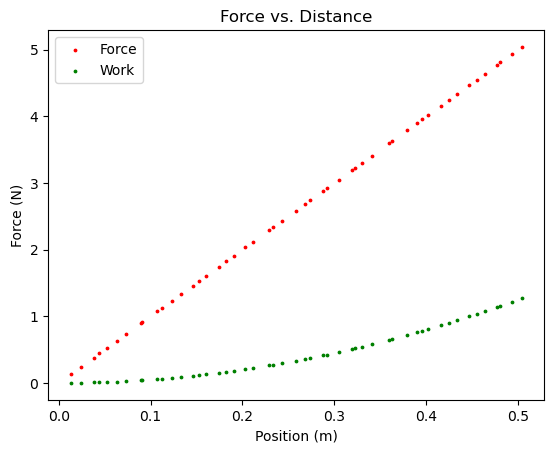

In [30]:

forces = np.loadtxt('forces.txt')

size = np.shape(forces)[0] #the number of columns in the array (which is 50)

plt.scatter(forces[:,0],forces[:,1],s=3,c='r',label='Force') #plot of forces vs distance
plt.xlabel('Position (m)')
plt.ylabel('Force (N)')
plt.title('Force vs. Distance')



work = [0] #initial work is 0 and others will be added to it
s = 0
for b in range(1,size): #start at 1 because of how we define h
    h = forces[b,0]-forces[b-1,0]
    s += (h*(forces[b-1,1] + forces[b,1])/2)
    work.append(s)

print('The total work done is',max(work),'N.')
            
plt.scatter(forces[:,0],work,s=3,c='g',label='Work') #plot of works vs distance
plt.legend()



plt.show()

To store all my work values, I started with a list that began as [0], and then I added to the list with a running sum s and used each integral to add to s. I appended s to the end of the list, so the work continues summing up the value of the trapezoids each loop through the size of the array.